<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/delivery_time_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("/content/delivery_time (1).csv")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
#correletion 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


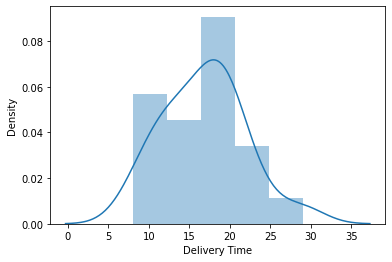

In [7]:
sns.distplot(data['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


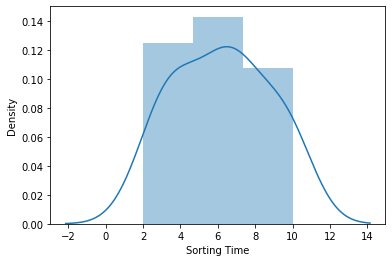

In [9]:
sns.distplot(data['Sorting Time'])

In [11]:
data_1 = data.rename(columns = {'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, inplace = False)


In [13]:
#fitting regression model
model=smf.ols("delivery_time~sorting_time",data=data_1).fit()

In [14]:
model

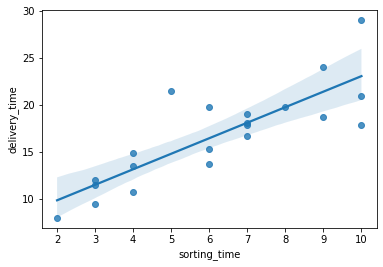

In [15]:
sns.regplot(x="sorting_time",y="delivery_time",data=data_1);

In [16]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [23]:
#predict for new delivery time
newdata=pd.Series([1,8,10])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [25]:
model.predict(data_pred)

0     8.231754
1    19.774893
2    23.072933
dtype: float64